# factors that affects Bike Trips ( fordgobike )
## by (Omar Mousa)

## Investigation Overview

in this invesegation, we was trying to find out factors that can affect duration of bike trips and number of bike riders, the main factors we were focusing on is (user type , user gender, user age , if user was in bick-share-for-all program or not)

## Dataset Overview

This data set we are investigating includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. the data has about 183,412 rows ( individual rides ) and 16 columns.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_ford = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
df_ford['member_birth_year'].fillna(value = round(df_ford['member_birth_year'].mode()[0], 0), inplace = True)
df_ford['start_time'] = pd.to_datetime(df_ford['start_time'])
df_ford['end_time'] = pd.to_datetime(df_ford['end_time'])
df_ford['start_month'] = df_ford['start_time'].dt.month_name()
df_ford['start_day'] = df_ford['start_time'].dt.day_name()
df_ford['start_hour'] = df_ford['start_time'].dt.hour
df_ford['start_year'] = df_ford['start_time'].dt.year
df_ford['member_age'] = df_ford['start_year'] - df_ford['member_birth_year']
df_ford['member_gender'].fillna(df_ford['member_gender'].mode()[0], inplace = True)
df_ford = df_ford.query('member_age < 65')
df_ford = df_ford.query('duration_sec < 2800 ')

## Distribution of Bike trips per hour.

bike trips distributed wiedly on all hours of the day, most of the trips are between 7 AM and 7 PM with peaks at 8 AM and 5 PM. the distribution of bike trips per day take a bimodal distribution shape.

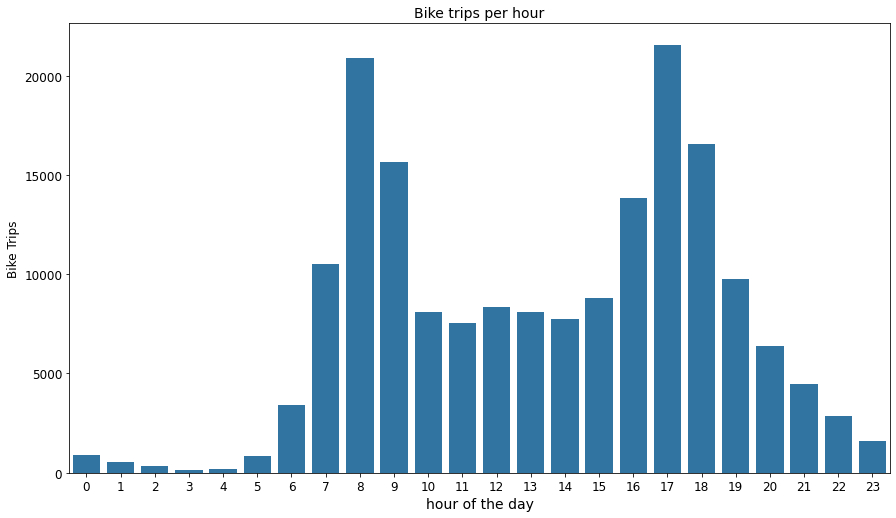

In [12]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(14.70, 8.27))
sb.countplot(data = df_ford, x = 'start_hour' ,color = base_color, alpha = 1);
plt.tick_params(axis='both', which='major', labelsize=12);
plt.xlabel("hour of the day", fontsize = 14);
plt.ylabel("Bike Trips", fontsize = 12);
plt.title("Bike trips per hour", fontsize = 14);

## Distribution of Bike trips per day.

bike trips distributed on all days of the week, least amount of the trips were on weekends ( sundays, saturdays), as most of people don't have to go to work on weekends and students don't go school or college.

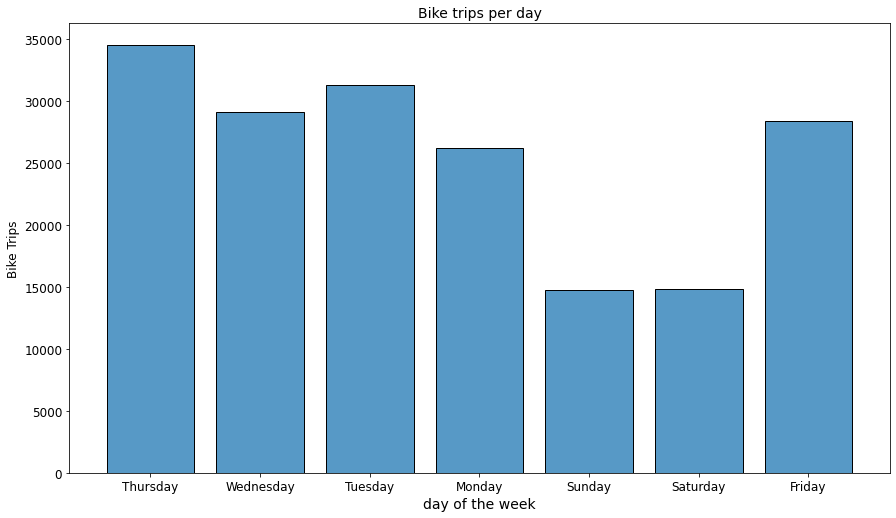

In [18]:
plt.figure(figsize=(14.70, 8.27))
sb.histplot(df_ford['start_day'], shrink = 0.8 )
plt.tick_params(axis='both', which='major', labelsize=12);
plt.xlabel("day of the week", fontsize = 14);
plt.ylabel("Bike Trips", fontsize = 12);
plt.title("Bike trips per day", fontsize = 14);

## Bike Trips for Customers and Subscribers

customers spend more time in their trips on average, we can see that most subsrcribers trips are nearly of the same duration, but for subscibers the trip duration distribution is much wider as they spend different amount of time in their trips.

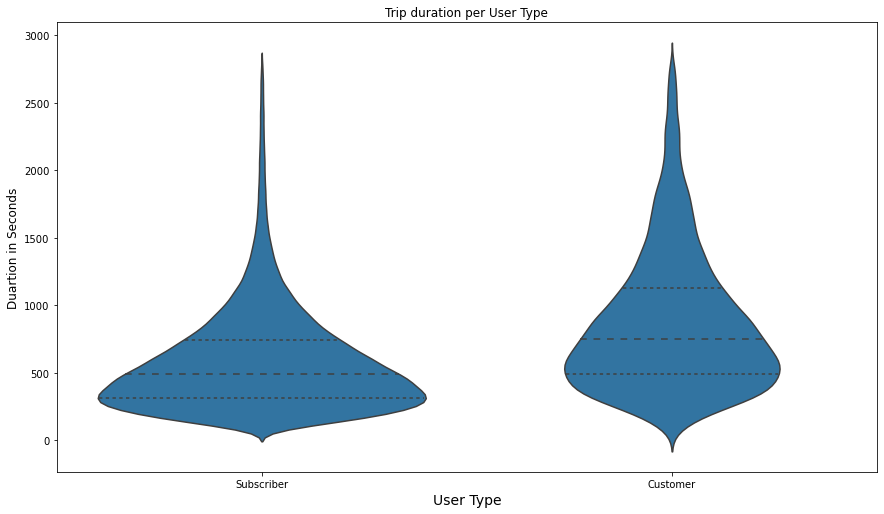

In [16]:
plt.figure(figsize=(14.70, 8.27))
base_color = sb.color_palette()[0]
sb.violinplot(data=df_ford, x='user_type', y='duration_sec', color = base_color, inner='quartile');
plt.xlabel("User Type", fontsize = 14);
plt.ylabel("Duartion in Seconds", fontsize = 12);
plt.title("Trip duration per User Type", fontsize = 12);

## Duration of Trip vs Member Age

there is a weak positive realtion between member age and duration of the trip, people who are 30 years old spent more time in the trips

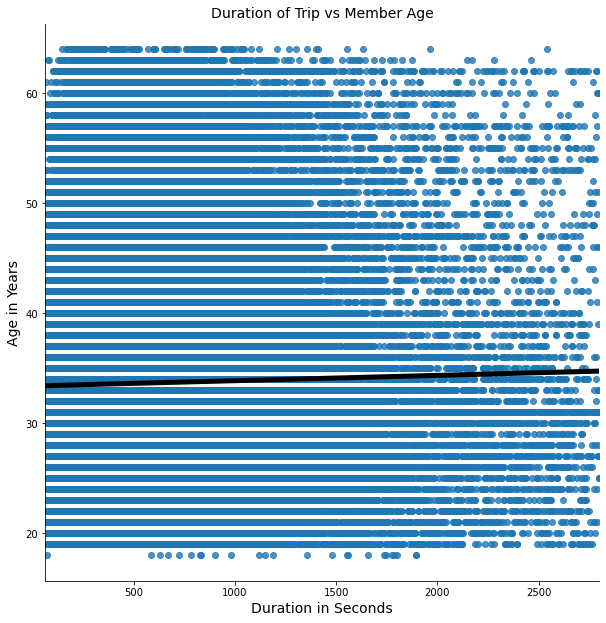

In [21]:
sb.lmplot(data = df_ford, x = 'duration_sec', y= 'member_age', height = 8.27, line_kws={'color': 'black', "lw":5});
plt.ylabel("Age in Years", fontsize = 14);
plt.xlabel("Duration in Seconds", fontsize = 14);
plt.title("Duration of Trip vs Member Age", fontsize = 14);

## trip duration for members in bike share program

people who aren't members in (bike_share_program_for_all) are spending much time on their trips in average cmpared to people who are members in the program.

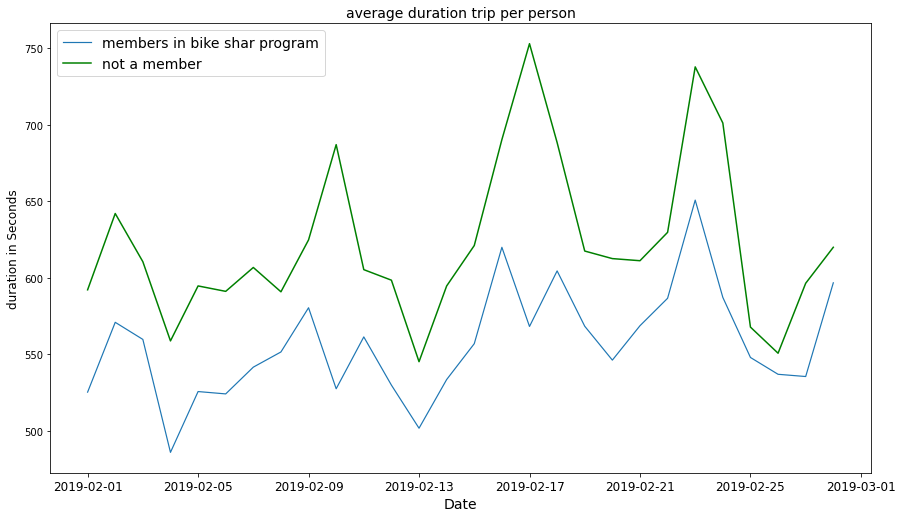

In [22]:
df6 = df_ford.query("bike_share_for_all_trip =='Yes'")
df7 = df_ford.query("bike_share_for_all_trip =='No'")

plt.figure(figsize=(14.70, 8.27))
sb.lineplot(data =df6.groupby(df_ford['start_time'].dt.date)['duration_sec'].mean(), color = base_color, linewidth = 1.2);
sb.lineplot(data =df7.groupby(df_ford['start_time'].dt.date)['duration_sec'].mean(), color = 'g',linewidth = 1.5);
plt.legend(['members in bike shar program','not a member'], fontsize = 14);
plt.xticks(fontsize = 12);
plt.xlabel("Date", fontsize = 14);
plt.ylabel("duration in Seconds", fontsize = 12);
plt.title('average duration trip per person', fontsize = 14);

## trips Duration over the day per gender

although people whose gender is "other" represents the lowst percentage of bike riders in our data, they spend much more time in their trips if compared to "Female" or "Male" , we can also see that females spend more time in trips than males on average.

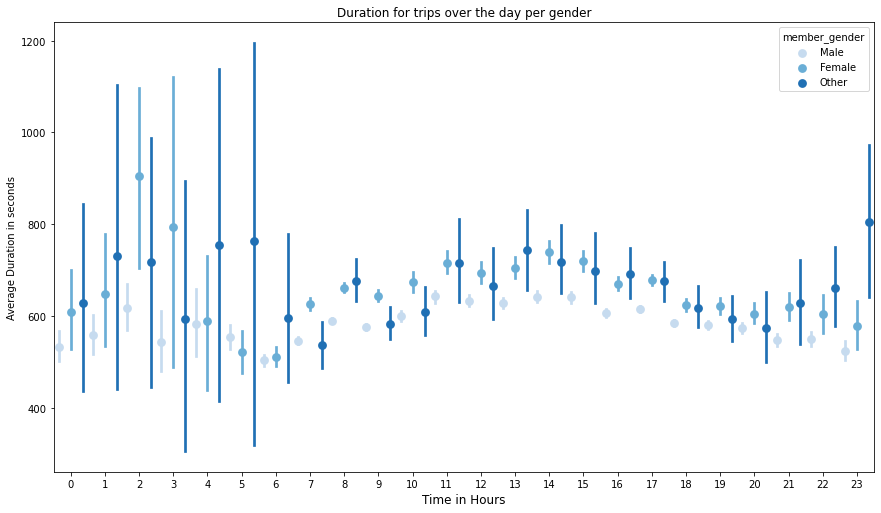

In [25]:
plt.figure(figsize=(14.70, 8.27))
sb.pointplot(data = df_ford, x = 'start_hour', y = 'duration_sec', hue = 'member_gender',
                                          palette = 'Blues', linestyles = '', dodge = 0.7)
plt.title('Duration for trips over the day per gender')
plt.ylabel('Average Duration in seconds')
plt.xlabel("Time in Hours", fontsize = 12)
plt.show();

## Trips Duration for Different ages per User Type

average trips duration for customers is higher than average trip duration for subscribers,people of different ages spend nearly the same time per user type, people who are 18 years old spend much time in trips.

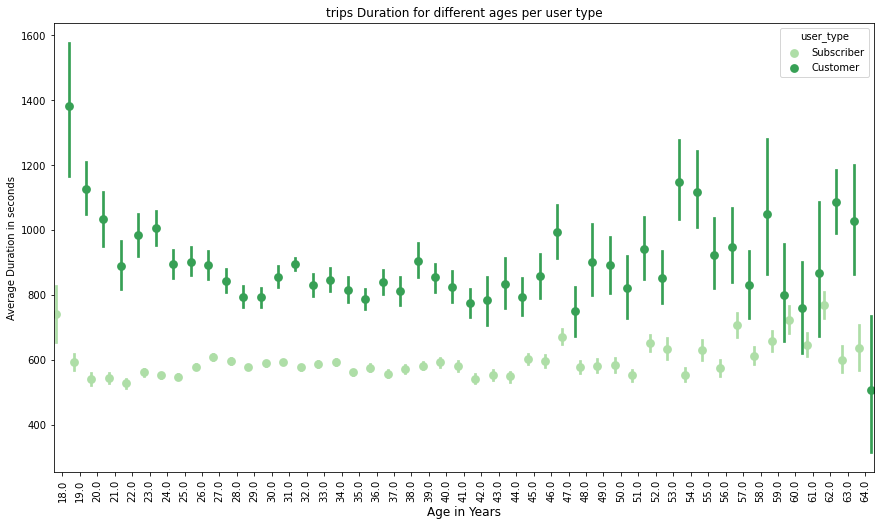

In [26]:
plt.figure(figsize=(14.70, 8.27))
sb.pointplot(data = df_ford, x = 'member_age', y = 'duration_sec', hue = 'user_type',
           palette = 'Greens', linestyles = '', dodge = 0.7)
plt.title('trips Duration for different ages per user type')
plt.ylabel('Average Duration in seconds')
plt.xlabel("Age in Years", fontsize = 12)
plt.xticks(rotation= 90)
plt.show();